In [132]:
#Imported Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

#other libraries

from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")



In [134]:
df = pd.read_csv("creditcard.csv")

In [135]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [136]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [137]:
df.isnull().sum().max()

0

In [138]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [139]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df)*100,2),'% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class distribution \n (0: No fraud || 1: Fraud)')

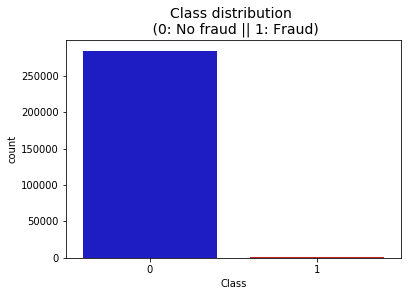

In [140]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data = df, palette = colors)
plt.title('Class distribution \n (0: No fraud || 1: Fraud)', fontsize = 14)

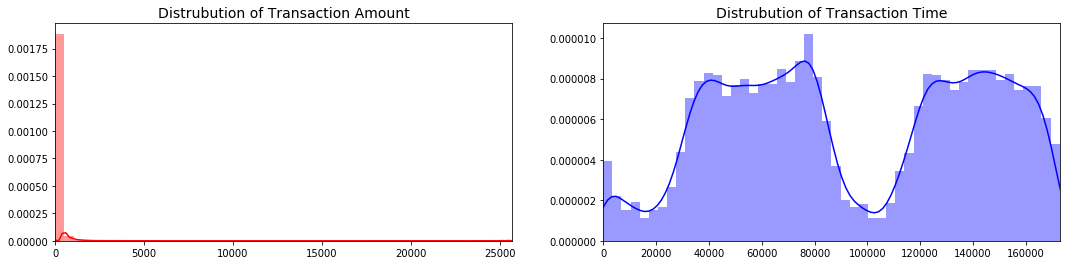

In [141]:
fig, ax = plt.subplots(1, 2, figsize = (18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distrubution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distrubution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [142]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [143]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount','scaled_time'], axis = 1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Splitting the Data(Original DataFrame)

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No frauds', round(df['Class'].value_counts()[0]/len(df)*100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df)*100,2), '% of the dataset')

X = df.drop('Class', axis = 1)
y = df['Class']

No frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [145]:
sss= StratifiedShuffleSplit(n_splits=5, test_size=.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('-'* 70)

print('Distribution: \ n')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
----------------------------------------------------------------------
Distribution: \ n
[0.99827075 0.00172925]
[0.99827955 0.00172045]


## Random Under-Sampling:

The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss

In [146]:
# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distribution_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distribution_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
48832,-0.293440,-0.480375,1.177430,0.613589,-0.366778,1.061900,0.497508,-0.197488,0.158662,0.020992,...,-0.068976,0.014126,0.147322,-0.151481,-0.396868,0.656930,-0.297398,0.048888,0.035898,0
42473,-0.254454,-0.511942,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,...,1.384743,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,1
68785,0.265493,-0.370693,1.031753,-0.087954,0.886308,1.176900,-0.674063,0.029303,-0.457008,0.266044,...,-0.164762,0.223313,0.547683,-0.046857,0.191303,0.326888,-0.290141,0.041108,0.023816,0
237426,-0.293440,0.758280,-1.370976,-0.025465,-2.774907,2.650530,4.511309,-3.289344,-0.118841,-0.014279,...,0.701292,-0.048061,-0.599350,0.072193,-0.600351,0.371331,-0.370951,0.011970,0.145895,1
249607,0.181653,0.820040,-7.381547,-7.449015,-4.696287,3.728439,6.198304,-6.406267,-5.831452,1.457175,...,2.932758,1.176575,-0.978692,-0.278330,-0.635874,0.123539,0.404729,0.704915,-1.229992,1


## Equally Distributing and Correlating

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

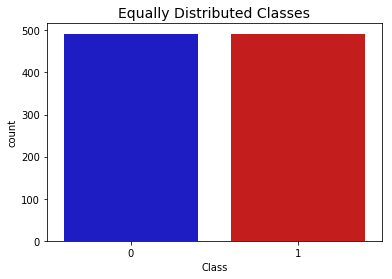

In [147]:
print("Distribution of the Classes in the subsample dataset")
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data= new_df, palette =  colors)
plt.title('Equally Distributed Classes', fontsize = 14)
plt.show

## Correlation Matrices

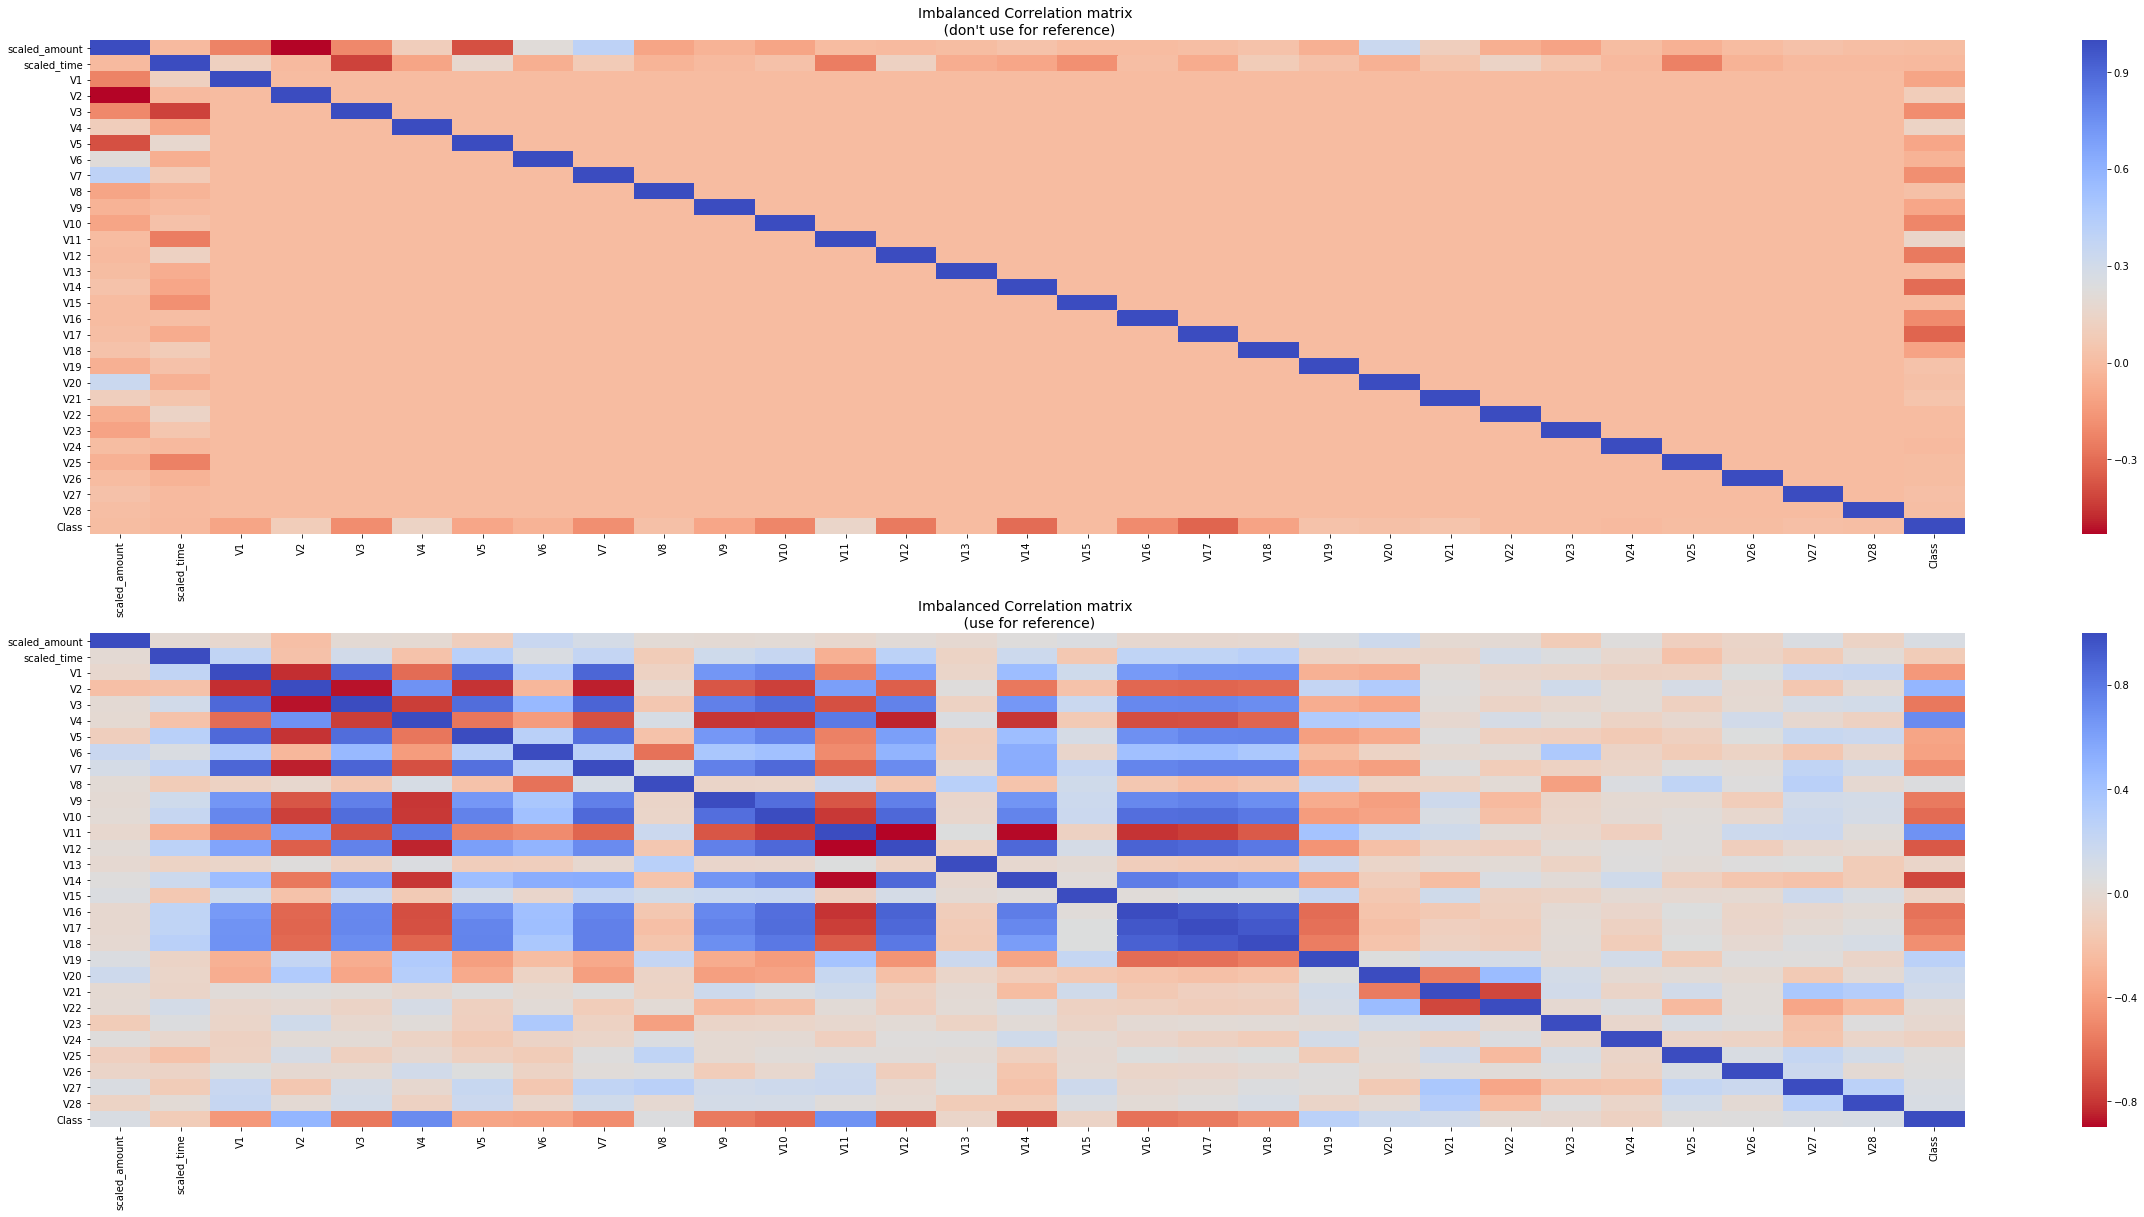

In [148]:
f, (ax1, ax2) = plt.subplots(2,1, figsize = (42,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax= ax1)
ax1.set_title("Imbalanced Correlation matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax= ax2)
ax2.set_title("Imbalanced Correlation matrix \n (use for reference)", fontsize=14)
plt.show()

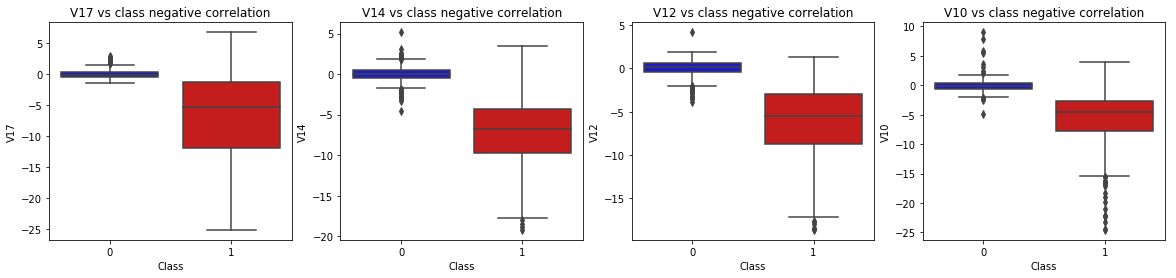

In [149]:
f, axes = plt.subplots(ncols = 4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

sns.boxplot(x='Class', y='V17', data = new_df, palette=colors, ax= axes[0])
axes[0].set_title('V17 vs class negative correlation')

sns.boxplot(x='Class', y='V14', data = new_df, palette=colors, ax= axes[1])
axes[1].set_title('V14 vs class negative correlation')

sns.boxplot(x='Class', y='V12', data = new_df, palette=colors, ax= axes[2])
axes[2].set_title('V12 vs class negative correlation')

sns.boxplot(x='Class', y='V10', data = new_df, palette=colors, ax= axes[3])
axes[3].set_title('V10 vs class negative correlation')

plt.show()

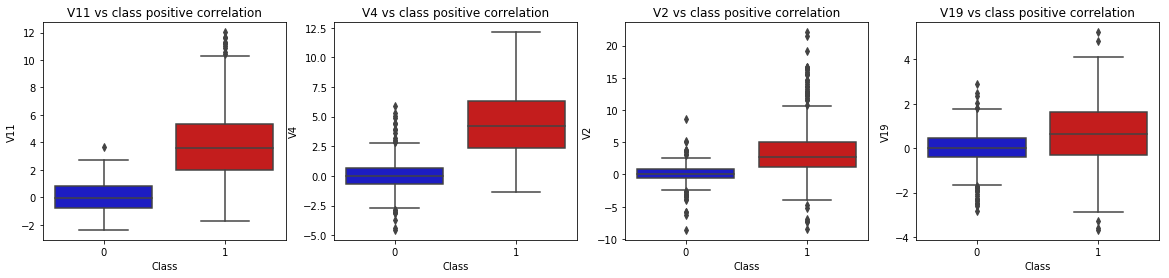

In [150]:
f, axes = plt.subplots(ncols = 4, figsize=(20,4))

# Positive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)

sns.boxplot(x='Class', y='V11', data = new_df, palette=colors, ax= axes[0])
axes[0].set_title('V11 vs class positive correlation')

sns.boxplot(x='Class', y='V4', data = new_df, palette=colors, ax= axes[1])
axes[1].set_title('V4 vs class positive correlation')

sns.boxplot(x='Class', y='V2', data = new_df, palette=colors, ax= axes[2])
axes[2].set_title('V2 vs class positive correlation')

sns.boxplot(x='Class', y='V19', data = new_df, palette=colors, ax= axes[3])
axes[3].set_title('V19 vs class positive correlation')

plt.show()

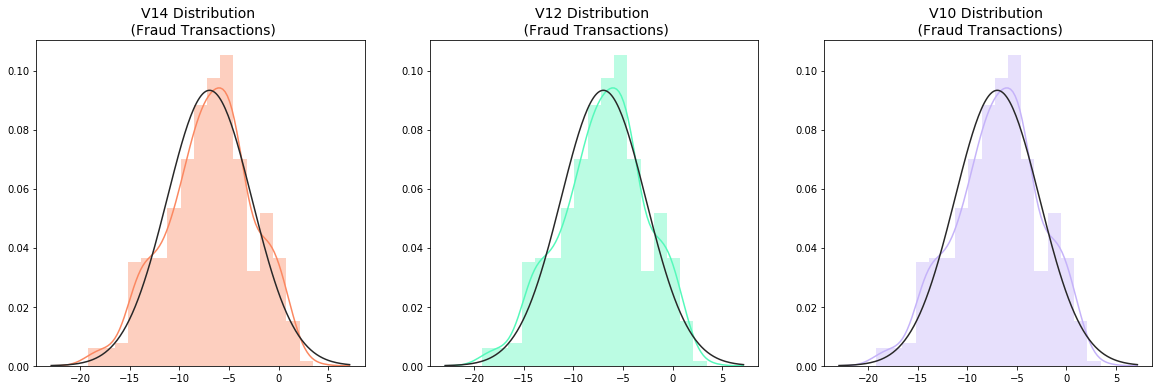

In [151]:
from scipy.stats import norm

f, (ax1, ax2, ax3)= plt.subplots(1,3, figsize = (20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [152]:
#V14 Removing Outliers (Highest Negative Correlated with Labels)

v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | quartile 75 :{}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr*1.5
v14_lower, v14_upper = q25 -v14_cut_off, q75+v14_cut_off
print('Cut off : {}'.format(v14_cut_off))
print('V14 Lower : {}'.format(v14_lower))
print('V14 Upper : {}'.format(v14_upper))

outliers = [x for x in v14_fraud 
            if x < v14_lower or x > v14_upper]
print('Feature v14 outliers for the fraud cases : {}'.format(len(outliers)))
print('V14 outliers: {}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14']>v14_upper) | (new_df['V14']<v14_lower)].index)
print('-'*50)

#V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class']==1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | quartile 75 :{}'.format(q25, q75))
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr*1.5
v12_lower, v12_upper = q25 -v12_cut_off, q75+v12_cut_off
print('Cut off : {}'.format(v12_cut_off))
print('V12 Lower : {}'.format(v12_lower))
print('V12 Upper : {}'.format(v12_upper))

outliers = [x for x in v12_fraud 
            if x < v12_lower or x > v12_upper]
print('Feature v12 outliers for the fraud cases : {}'.format(len(outliers)))
print('V12 outliers: {}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V12']>v12_upper) | (new_df['V12']<v12_lower)].index)
print('-'*50)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | quartile 75 :-4.282820849486866
iqr: 5.409902115485519
Cut off : 8.114853173228278
V14 Lower : -17.807576138200663
V14 Upper : 3.8320323237414122
Feature v14 outliers for the fraud cases : 4
V14 outliers: [-18.8220867423816, -19.2143254902614, -18.049997689859396, -18.4937733551053]
--------------------------------------------------
Quartile 25: -8.67303320439115 | quartile 75 :-2.893030568676315
iqr: 5.780002635714835
Cut off : 8.670003953572252
V12 Lower : -17.3430371579634
V12 Upper : 5.776973384895937
Feature v12 outliers for the fraud cases : 4
V12 outliers: [-18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993]
--------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-16.7460441053944, -15.2399619587112, -16.6011969664137, -15.563791338730098, -24.5882624372475, -23.2282548357516, -15.124162814494698, -22.1870885620007, -20.949191554361104, -22.1870885

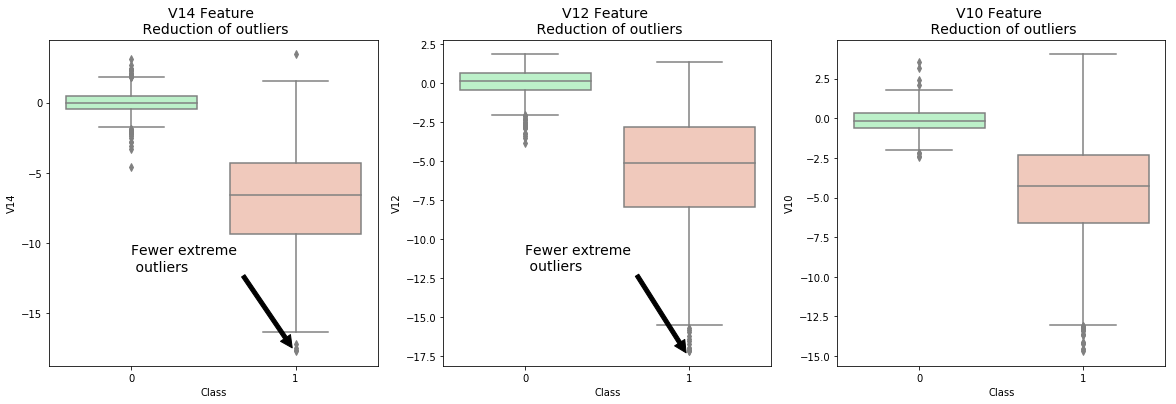

In [153]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x='Class', y='V14', data=new_df, ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(.98, -17.5), xytext=(0,-12),
            arrowprops=dict(facecolor='black'), 
            fontsize=14)

# Feature V12
sns.boxplot(x='Class', y='V12', data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(.98, -17.3), xytext=(0,-12),
            arrowprops=dict(facecolor='black'), 
             fontsize=14)

# Feature V10
sns.boxplot(x='Class', y='V10', data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(.95, -16.5), xytext=(0,-12),
            arrowprops=dict(facecolor='black'), 
             fontsize=14)

plt.show()

In [154]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y=new_df['Class']

#T-sne implementation
t0=time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1=time.time()
print("TSNE took {:.2}s".format(t1-t0))

#PCA implementation
t0=time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1=time.time()
print('PCA took {:}s'.format(t1-t0))

#TruncatedSVD
t0=time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized' ,random_state=42).fit_transform(X.values)
t1=time.time()
print('TruncatedSVD took {:}s'.format(t1-t0))

TSNE took 8.8s
PCA took 0.4643125534057617s
TruncatedSVD took 0.003989458084106445s


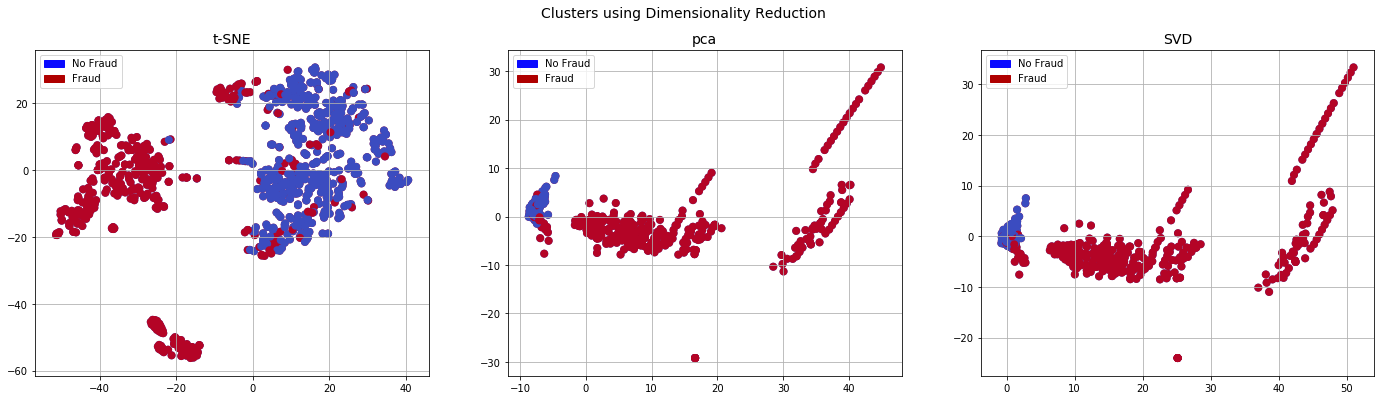

In [155]:
f, (ax1, ax2, ax3)= plt.subplots(1,3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-sne scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# pca scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('pca', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [156]:
# Undersampling before cross validating (prone to overfit)

X = new_df.drop('Class', axis=1)
y=new_df['Class']

In [157]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [158]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [159]:
# Let's implement simple classifiers

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [160]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers:", classifier.__class__.__name__,"Has a training score of", round(training_score.mean(), 2)*100, "% accuracy score")

Classifiers: LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers: KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers: SVC Has a training score of 94.0 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [161]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

#Logistic Regression
log_reg_params = {"penalty": ['l1','l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

log_reg = grid_log_reg.best_estimator_

#KNearest Neighbor
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm':['auto','ball_tree','kd_tree','brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_

#SVC
svc_params = {'C':[0.5,0.7,0.9,1], 'kernel':['rbf','poly','sigmoid','linear']}
grid_svc= GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

#DecisionTree Classifier
tree_params={"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_

In [162]:
#Overrfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score:', round(log_reg_score.mean()*100,2).astype(str)+'%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbor Cross Validation Score:', round(knears_score.mean()*100,2).astype(str)+'%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score:', round(svc_score.mean()*100,2).astype(str)+'%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score:', round(tree_score.mean()*100,2).astype(str)+'%')


Logistic Regression Cross Validation Score: 93.9%
Knears Neighbor Cross Validation Score: 93.91%
Support Vector Classifier Cross Validation Score: 94.56%
DecisionTree Classifier Cross Validation Score: 92.19%


In [163]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution:{}'.format(Counter(y_nearmiss)))

# Cross Validating the right way
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [265505 180253  42621 ...  29015  13728  17621] Test: [263006  11345 147253 ... 274525 269810  64118]
Train: [ 72183 114242  16767 ... 264455 191864 284015] Test: [202595  32936 128092 ... 243996 127637  48256]
Train: [ 20840 114582 167609 ... 244474 178916 218473] Test: [284350  82435  90938 ... 171153 168735 271594]
Train: [122218 181611 194350 ... 104586 277581  29388] Test: [225640  63297  67981 ... 279449  77507  76000]
Train: [241657 223432 136909 ...  86446 160468  49572] Test: [157474 204817  83711 ... 251452 178911 216815]
NearMiss Label Distribution:Counter({0: 492, 1: 492})


In [164]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1,estimator2,estimator3,estimator4, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
        
    #First Estimator

    train_sizes, train_scores, test_scores = learning_curve(
    estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis = 1)
    ax1.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=.1, color='#ff9124')
    ax1.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=.1, color='#2492ff')
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
 
    #Second Estimator

    train_sizes, train_scores, test_scores = learning_curve(
    estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis = 1)
    ax2.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=.1, color='#ff9124')
    ax2.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=.1, color='#2492ff')
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
#Third Estimator

    train_sizes, train_scores, test_scores = learning_curve(
    estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis = 1)
    ax3.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=.1, color='#ff9124')
    ax3.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=.1, color='#2492ff')
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
#Fourth Estimator

    train_sizes, train_scores, test_scores = learning_curve(
    estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis = 1)
    ax4.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=.1, color='#ff9124')
    ax4.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=.1, color='#2492ff')
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("DecisionTree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\MYPC\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

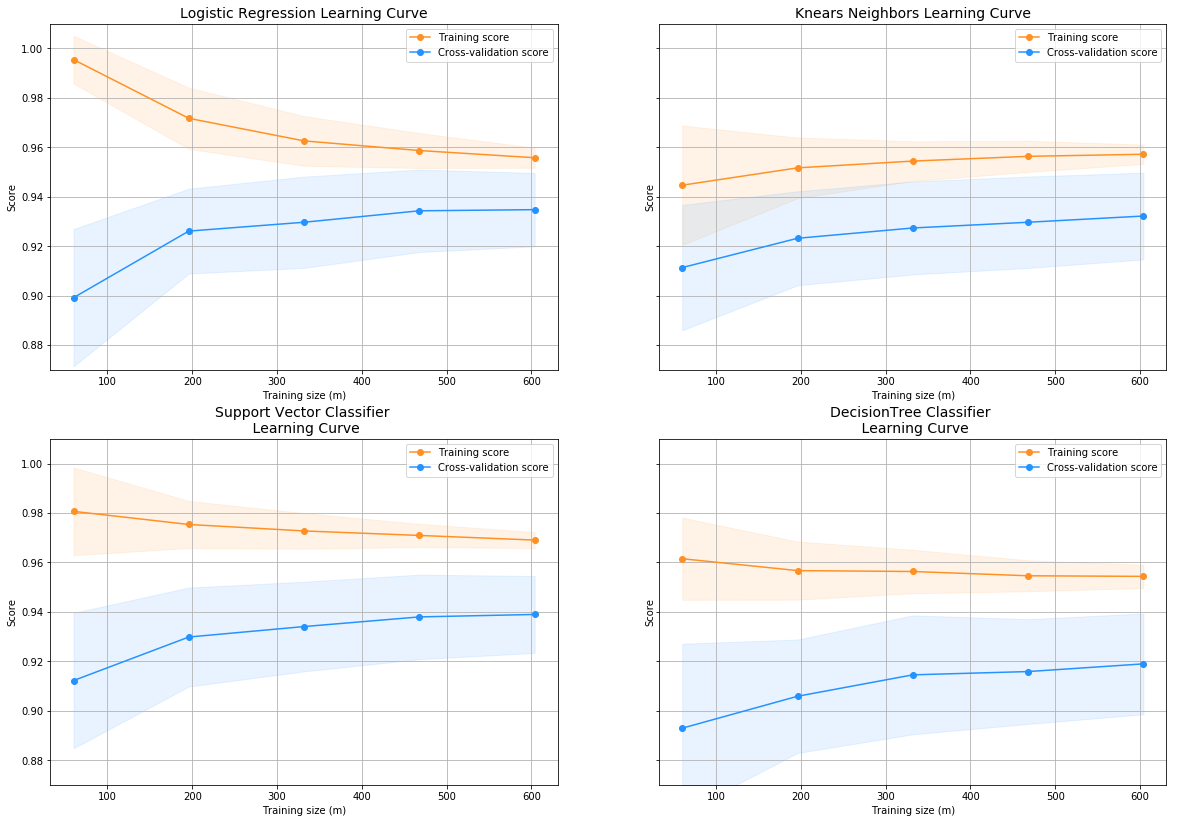

In [165]:
cv = ShuffleSplit(n_splits=100, test_size= 0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (.87,1.01), cv=cv, n_jobs=4)